In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

%matplotlib inline

# 時系列データ

## 時系列(time series)とは
> 時間の経過とともに不規則に変動する現象の記録

たとえば、以下のような記録が時系列データである。

 - 気圧、気温や雨量などの気象情報
 - 地震波の記録
 - 株価や為替トレードなどの経済現象の記録
 - 脳波や心電図などの医学データ

## 時系列データの図示
時系列解析の第一歩として、まずデータを図示してみることが重要である。<br>
これにより、時系列の大まかな特徴を捉えることができるばかりでなく、今後どのような解析を行うべきか、その方針をたてることができる。

In [15]:
from datetime import datetime
import pandas_datareader.data as web

日経255平均株価 = web.DataReader("NIKKEI225", "fred", datetime(1988, 1, 4), datetime(1993, 12, 30))

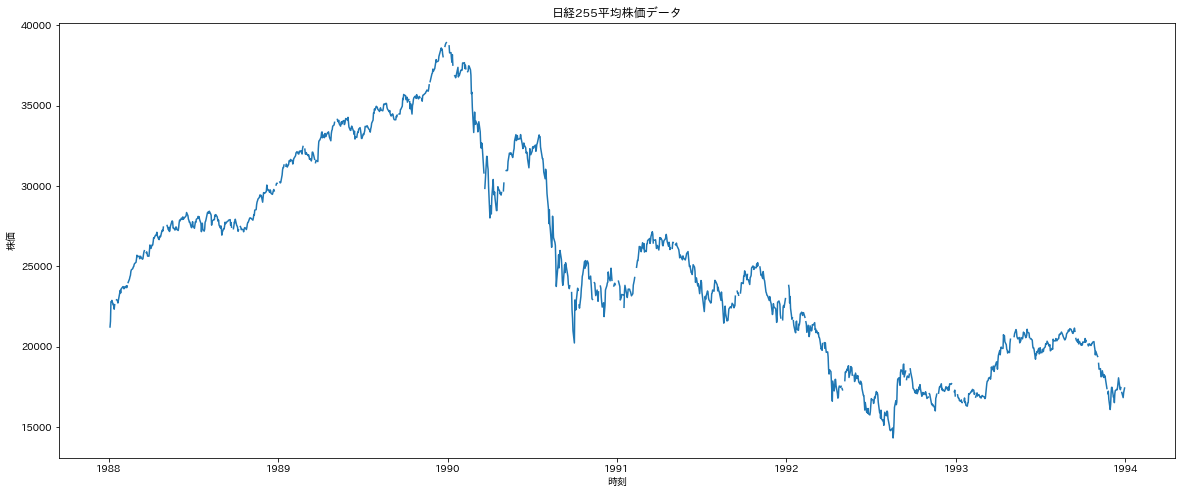

In [28]:
plt.figure(figsize=(20, 8))
plt.title('日経255平均株価データ')
plt.plot(日経255平均株価)
plt.ylabel('株価')
plt.xlabel('時刻')
plt.show()

---

# 時系列の分類

## 連続時間時系列と離散時間時系列

## 一変量時系列と多変量時系列

## 定常時系列と非定常時系列

## ガウス型時系列と非ガウス型時系列

## 線形時系列と非線形時系列

## 欠損値と異常値

---

# 時系列解析の目的

 - **記述(description)**
 - **モデリング(modeling)**
 - **予測(prediction)**
 - **信号抽出(signal extraction)**

---

# 時系列データの前処理

## 変数変換

### 値の増加に伴って、変動の大きさも増大する場合
金額や人数などのデータは、<b style="color: red;">値の増加に伴って、変動の大きさも増大する</b>という特徴を持っている。<br>
このような場合、以下のように原系列$y_{n}$を対数変換することで、分散がほとんど一様になったり、誤差分布がほぼ正規分布と見なせる場合がある。

$$
z_{n} = \log {y_{n}}
$$

### 時系列$y_{n}$がある事象が起こる確率や割合の場合
ある事象が起こる確率や割合のような、$\left(0,1\right)$上の値をとる時系列$y_{n}$の場合には、ロジット変換
$$
z_{n} = \log {\left( \frac {y_{n}}{1 - y_{n}} \right)}
$$
によって$\left( - \infty, \infty \right)$上の値をとる時系列$z_{n}$が得られる。

$z_{n}$のほうが分布の歪が少なく、モデリングが容易なことが多い。

## 差分(階差)

### 顕著なトレンドを含む場合
時系列$y_{n}$が、顕著なトレンドを含む場合には、まず差分系列を求め、$z_{n}$を解析することがある。

$$
z_{n} = \Delta y_{n} = y_{n} - y_{n - 1}
$$

これは、$y_{n}$が直線で

$$
\begin{eqnarray}
y_{n} & = & トレンド + 増加幅 \cdot 時刻 \\
& = & a + b \cdot n 
\end{eqnarray}
$$

と表される場合には、$z_{n} = \Delta y_{n} = b$となって、直線の傾き(a)が除去できるからである。

### 年周期が見られる場合
年周期が見られる場合には、一周期前の値と差分を利用することがある。

$$
{\Delta}_{p} y_{n} = y_{n} - y_{n - p}
$$

### 対数値の差分系列
$$
\log {y_{n}} - \log {y_{n - 1}}
$$
ファイナンスの分野では、ボラティリティ(volatility; 株価などの変動率)の分析で用いられる系列である。

## 前期比、前年同期比

$$
z_{n} = \frac {y_{n}}{y_{n - 1}}
$$

$$
x_{n} = \frac {y_{n}}{y_{n - p}}
$$

## 移動平均
変動の激しい時系列を滑らかにする簡便な方法として移動平均がある。

### 単純移動平均
$$
{\bar {y}}_{n} = \frac {1}{2 k + 1} \sum _{j = -k}^{k}{y_{n + j}}
$$

ex) k = 2の場合
$$
{\bar {y}}_{n} = \frac {1}{2 k + 1} \left( y_{n - 2} + y_{n - 1} + y_{n} + y_{n + 1} + y_{n + 2} \right)
$$

### 重みつき移動平均
移動平均を一般化したものとして、$\sum _{j=-k}^{k}{w_{j}} = 1, \quad w_{j} \ge 0$を満たす重み係数を用いて定義される、重みつき移動平均がある。
$$
{\bar {y}}_{n} = \sum _{j = -k}^{k}{ w_{j} y_{n - j} }
$$

### 移動メディアン
$$
{\bar {y}}_{n} = \mathrm {median} \left\{ {\bar {y}}_{n - k}, \cdots, {\bar {y}}_{n}, \cdots, {\bar {y}}_{n + k} \right\}
$$

---

# 時系列データの解析

## データの図示
> 時系列解析の第一歩として、まずデータを図示してみることが重要である。これにより、時系列の大まかな特徴を捉えることができるばかりでなく、今後どのような解析を行うべきか、その方針をたてることができる。

In [29]:
from datetime import datetime
import pandas_datareader.data as web

日経255平均株価 = web.DataReader("NIKKEI225", "fred", datetime(1988, 1, 4), datetime(1993, 12, 30))
ドル円為替レート = web.DataReader("DEXJPUS", "fred", datetime(1990, 7, 2), datetime(2019, 7, 2))

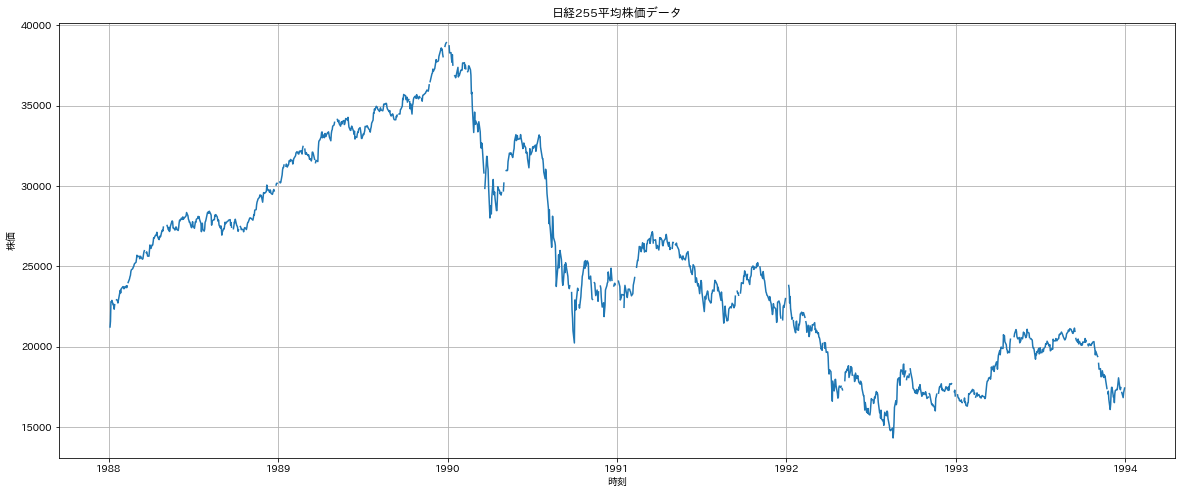

In [33]:
plt.figure(figsize=(20, 8))
plt.title('日経255平均株価データ')
plt.plot(日経255平均株価)
plt.ylabel('株価')
plt.xlabel('時刻')
plt.grid()
plt.show()

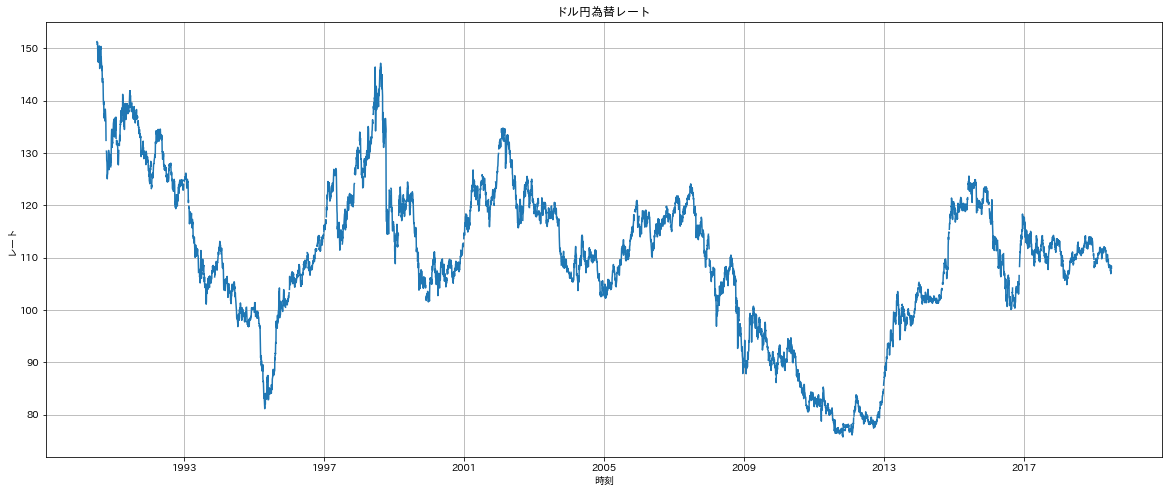

In [34]:
plt.figure(figsize=(20, 8))
plt.title('ドル円為替レート')
plt.plot(ドル円為替レート)
plt.ylabel('レート')
plt.xlabel('時刻')
plt.grid()
plt.show()